#### Breast-Cancer-Prediction Using KNN (Classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('breast_cancer-wisconsin-data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.shape

(569, 31)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.20, random_state=2)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]], shape=(455, 30))

In [13]:
X_test

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]], shape=(114, 30))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9736842105263158

Using ELBOW method to select the best value of `k`:

In [18]:
scores = []

for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))

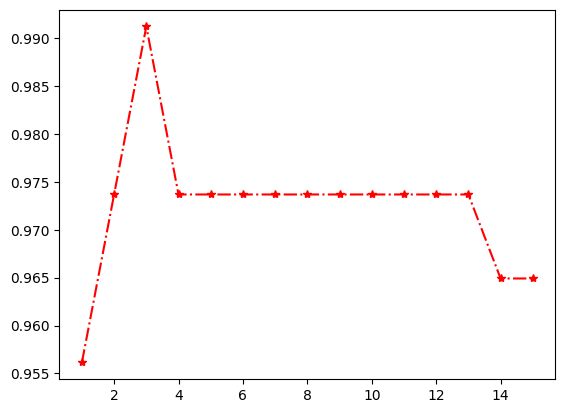

In [19]:
plt.plot(range(1, 16), scores, color='red', marker="*", linestyle="-.")

from the visualization we can say that "The best value of `k` is $3$". Let's verify this:

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.9912280701754386

Just like that the accuracy jumped from $97%$ to $99%$ percent.

##### Visualize Underfitting and Overfitting in dataset:

Now, we can only visualize 2 to 3 columns at a given time. we can use first 2 columns to get an idea as for how the value of `k` affects the model performance:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, fixed

def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .05
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));

interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

--- 

##### Limitations of KNN

While K-Nearest Neighbors (KNN) is intuitive and easy to implement, it relies heavily on the "geometry" of the data. When that geometry becomes messy or misleading, the algorithm fails.

Here are the primary failure cases for KNN:

##### 1. The Curse of Dimensionality

As you add more features (dimensions), the "volume" of the space grows exponentially. In high-dimensional space, data points become incredibly sparse, and the distance between any two points starts to become almost equal.

* **The Failure:** KNN loses its ability to distinguish between "near" and "far." It basically starts guessing because every point looks equally distant from the query point.
* **Solution:** Use dimensionality reduction (like PCA) or feature selection before running KNN.

##### 2. Imbalanced Class Distribution

KNN makes decisions based on a majority vote. If one class has 90% of the data and another has 10%, the majority class will naturally dominate the "neighborhood" of any new point.

* **The Failure:** The model becomes biased toward the majority class, often misclassifying minority class points even if they are clearly clustered together.
* **Solution:** Use "Weighted KNN," where closer neighbors have more "voting power" than distant ones, or balance the dataset using oversampling (SMOTE).

##### 3. Sensitivity to Outliers and Noise

Since KNN is a "lazy learner" that relies on local data, a single outlier can completely shift the decision boundary, especially if  is small.

* **The Failure:** If  and your query point is near a mislabeled "noisy" point, the model will confidently give you the wrong answer.
* **Visual impact:** This creates "islands" in your decision boundaries (overfitting).
* **Solution:** Increase the value of  to "smooth out" the noise, or pre-process the data to remove outliers.

##### 4. Non-Standardized Scales

KNN calculates distance (usually Euclidean). If one feature is "Annual Income" (ranging from 0 to 1,000,000) and another is "Age" (ranging from 0 to 100), the Income feature will completely overwhelm the Age feature in the distance calculation.

* **The Failure:** The model ignores any feature with a smaller numerical range, treating it as if it doesn't exist.
* **Solution:** **Always** scale your data (Normalization or Standardization) before using KNN.

##### 5. Categorical & Missing Data

KNN is a distance-based algorithm, but "distance" doesn't naturally exist between categories like "Red" and "Blue" or "Apple" and "Orange."

* **The Failure:** Forcing these into numerical values (like 1, 2, 3) implies an order or distance that isn't real (e.g., is Blue "closer" to Red than Green?).
* **Missing Data:** KNN cannot handle missing values because it cannot calculate a distance to a "null" point.

---

### Summary Table

| Failure Case | Symptom | Fix |
| --- | --- | --- |
| **High Dimensions** | All points seem equally far away | PCA / Feature Selection |
| **Imbalanced Data** | Model only predicts the majority class | Weighted KNN / SMOTE |
| **Small  + Noise** | Overfitting / "Jittery" boundaries | Increase  |
| **Different Scales** | One feature dominates the logic | `StandardScaler` |

---